In [1]:
import tensorflow as tf
import numpy as np

In [2]:
X = []
Y = []
for i in range(6):
    
    lst = list(range(i, i+4))
    
    X.append(list(map(lambda c : [c/10], lst)))
    Y.append((i+4)/10)
    
X = np.array(X)
Y = np.array(Y)
for i in range(len(X)):
    print(X[i], Y[i])

[[0. ]
 [0.1]
 [0.2]
 [0.3]] 0.4
[[0.1]
 [0.2]
 [0.3]
 [0.4]] 0.5
[[0.2]
 [0.3]
 [0.4]
 [0.5]] 0.6
[[0.3]
 [0.4]
 [0.5]
 [0.6]] 0.7
[[0.4]
 [0.5]
 [0.6]
 [0.7]] 0.8
[[0.5]
 [0.6]
 [0.7]
 [0.8]] 0.9


In [3]:
X.shape

(6, 4, 1)

In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units=10, return_sequences=False, input_shape=[4,1]),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 10)                120       
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.fit(X, Y, epochs=100, verbose=0)

In [7]:
model.predict(np.array([[[0.6],[0.7],[0.8],[0.9]]]))

array([[0.833309]], dtype=float32)

In [8]:
model.predict(np.array([[[-0.1],[0.0],[0.1],[0.2]]]))

array([[0.38226718]], dtype=float32)

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units=10, return_sequences=True, input_shape=[4,1]),
    tf.keras.layers.SimpleRNN(units=10, return_sequences=True, input_shape=[4,1]),
    tf.keras.layers.SimpleRNN(units=10, return_sequences=True, input_shape=[4,1]),
    tf.keras.layers.SimpleRNN(units=10, return_sequences=False, input_shape=[4,1]),
    tf.keras.layers.Dense(1)
    
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 4, 10)             120       
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 4, 10)             210       
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 4, 10)             210       
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 10)                210       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 761
Trainable params: 761
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.fit(X, Y, epochs=100, verbose=1)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 2.2262
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 1.9952
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 1.7719
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 1.5575
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 1.3533
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 1.1602
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 0.9792
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 0.8112
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 0.6571
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 0.5179
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - loss: 0.3945
Epoch 12/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2878
Epoch 13/100
1/1 [==============================] - 0s 6ms/ste

In [12]:
model.predict(np.array([[[0.6],[0.7],[0.8],[0.9]]]))

array([[0.8524009]], dtype=float32)

### LSTM

In [15]:
X = []
Y = []
for i in range(3000):
    lst = np.random.rand(100)
    idx = np.random.choice(100, 2, replace=False)
    zeros = np.zeros(100)
    zeros[idx] = 1
    X.append(np.array(list(zip(zeros, lst))))
    Y.append(np.prod(lst[idx]))
    
print(X[0], Y[0])

[[0.         0.4997219 ]
 [0.         0.81544104]
 [0.         0.66500182]
 [0.         0.08238003]
 [0.         0.78400333]
 [0.         0.70670133]
 [0.         0.67062144]
 [0.         0.20931336]
 [0.         0.94762014]
 [0.         0.25991877]
 [0.         0.8080865 ]
 [0.         0.15790128]
 [0.         0.10640814]
 [0.         0.20515662]
 [0.         0.48258717]
 [0.         0.56513706]
 [0.         0.76841283]
 [0.         0.49500217]
 [0.         0.17282092]
 [0.         0.78407271]
 [0.         0.33898342]
 [0.         0.76764702]
 [0.         0.59109731]
 [0.         0.23515034]
 [0.         0.69949127]
 [0.         0.55857166]
 [0.         0.39871865]
 [0.         0.32614806]
 [1.         0.13728273]
 [0.         0.74258689]
 [0.         0.73601446]
 [0.         0.64710913]
 [0.         0.76214063]
 [0.         0.65296314]
 [0.         0.25127739]
 [0.         0.3615881 ]
 [0.         0.15608917]
 [0.         0.88195639]
 [0.         0.3814739 ]
 [0.         0.27675347]


In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units=30, return_sequences=True, input_shape=[100,2]),
    tf.keras.layers.SimpleRNN(units=30),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_5 (SimpleRNN)     (None, 100, 30)           990       
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 30)                1830      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 2,851
Trainable params: 2,851
Non-trainable params: 0
_________________________________________________________________


In [17]:
X = np.array(X)
Y = np.array(Y)

history = model.fit(X[:2560], Y[:2560], epochs=100, validation_split=0.2)

Epoch 1/100
64/64 [==============================] - 2s 25ms/step - loss: 0.1323 - val_loss: 0.0556
Epoch 2/100
64/64 [==============================] - 2s 24ms/step - loss: 0.0495 - val_loss: 0.0532
Epoch 3/100
64/64 [==============================] - 2s 24ms/step - loss: 0.0519 - val_loss: 0.0530
Epoch 4/100
64/64 [==============================] - 2s 25ms/step - loss: 0.0519 - val_loss: 0.0514
Epoch 5/100
64/64 [==============================] - 1s 21ms/step - loss: 0.0504 - val_loss: 0.0534
Epoch 6/100
64/64 [==============================] - 1s 21ms/step - loss: 0.0516 - val_loss: 0.0517
Epoch 7/100
64/64 [==============================] - 1s 21ms/step - loss: 0.0512 - val_loss: 0.0579
Epoch 8/100
64/64 [==============================] - 1s 22ms/step - loss: 0.0485 - val_loss: 0.0516
Epoch 9/100
64/64 [==============================] - 1s 21ms/step - loss: 0.0495 - val_loss: 0.0511
Epoch 10/100
64/64 [==============================] - 1s 21ms/step - loss: 0.0500 - val_loss: 0.0521

64/64 [==============================] - 1s 21ms/step - loss: 0.0314 - val_loss: 0.0700
Epoch 83/100
64/64 [==============================] - 1s 21ms/step - loss: 0.0316 - val_loss: 0.0689
Epoch 84/100
64/64 [==============================] - 1s 21ms/step - loss: 0.0336 - val_loss: 0.0704
Epoch 85/100
64/64 [==============================] - 1s 21ms/step - loss: 0.0299 - val_loss: 0.0724
Epoch 86/100
64/64 [==============================] - 1s 21ms/step - loss: 0.0323 - val_loss: 0.0638
Epoch 87/100
64/64 [==============================] - 1s 21ms/step - loss: 0.0292 - val_loss: 0.0662
Epoch 88/100
64/64 [==============================] - 1s 21ms/step - loss: 0.0324 - val_loss: 0.0691
Epoch 89/100
64/64 [==============================] - 1s 21ms/step - loss: 0.0300 - val_loss: 0.0707
Epoch 90/100
64/64 [==============================] - 1s 21ms/step - loss: 0.0293 - val_loss: 0.0734
Epoch 91/100
64/64 [==============================] - 1s 21ms/step - loss: 0.0319 - val_loss: 0.0698
Epo

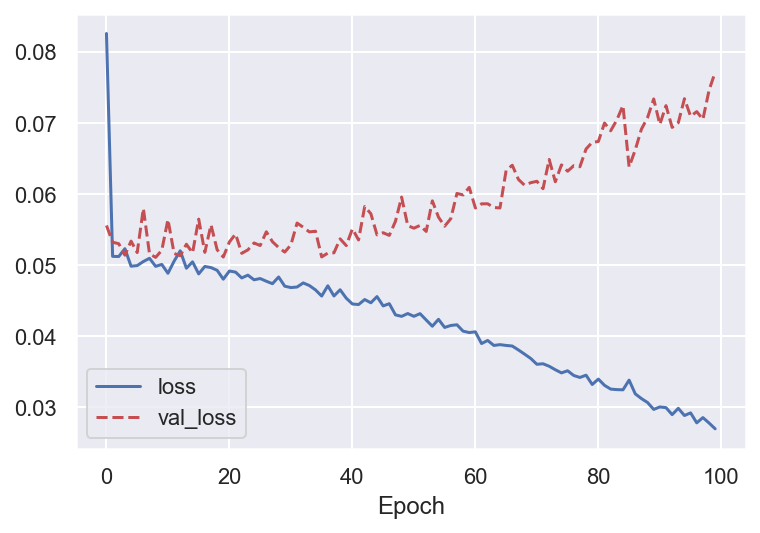

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [20]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units=30, return_sequences=True, input_shape=[100,2]),
    tf.keras.layers.LSTM(units=30),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 30)           3960      
_________________________________________________________________
lstm_1 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 11,311
Trainable params: 11,311
Non-trainable params: 0
_________________________________________________________________


In [21]:
X = np.array(X)
Y = np.array(Y)

history = model.fit(X[:2560], Y[:2560], epochs=100, validation_split=0.2)

Epoch 1/100
64/64 [==============================] - 4s 38ms/step - loss: 0.0683 - val_loss: 0.0506
Epoch 2/100
64/64 [==============================] - 2s 28ms/step - loss: 0.0482 - val_loss: 0.0528
Epoch 3/100
64/64 [==============================] - 2s 27ms/step - loss: 0.0521 - val_loss: 0.0515
Epoch 4/100
64/64 [==============================] - 2s 27ms/step - loss: 0.0505 - val_loss: 0.0512
Epoch 5/100
64/64 [==============================] - 2s 29ms/step - loss: 0.0509 - val_loss: 0.0514
Epoch 6/100
64/64 [==============================] - 2s 30ms/step - loss: 0.0482 - val_loss: 0.0513
Epoch 7/100
64/64 [==============================] - 2s 29ms/step - loss: 0.0493 - val_loss: 0.0509
Epoch 8/100
64/64 [==============================] - 2s 28ms/step - loss: 0.0502 - val_loss: 0.0508
Epoch 9/100
64/64 [==============================] - 2s 28ms/step - loss: 0.0484 - val_loss: 0.0510
Epoch 10/100
64/64 [==============================] - 2s 28ms/step - loss: 0.0502 - val_loss: 0.0514

64/64 [==============================] - 2s 29ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 83/100
64/64 [==============================] - 2s 29ms/step - loss: 7.7322e-04 - val_loss: 0.0012
Epoch 84/100
64/64 [==============================] - 2s 29ms/step - loss: 6.6000e-04 - val_loss: 0.0011
Epoch 85/100
64/64 [==============================] - 2s 29ms/step - loss: 6.9481e-04 - val_loss: 9.3905e-04
Epoch 86/100
64/64 [==============================] - 2s 28ms/step - loss: 7.8057e-04 - val_loss: 8.7976e-04
Epoch 87/100
64/64 [==============================] - 2s 29ms/step - loss: 6.8549e-04 - val_loss: 0.0011
Epoch 88/100
64/64 [==============================] - 2s 29ms/step - loss: 6.8979e-04 - val_loss: 9.3453e-04
Epoch 89/100
64/64 [==============================] - 2s 29ms/step - loss: 6.2809e-04 - val_loss: 9.1068e-04
Epoch 90/100
64/64 [==============================] - 2s 29ms/step - loss: 6.7176e-04 - val_loss: 0.0013
Epoch 91/100
64/64 [==============================] - 2s

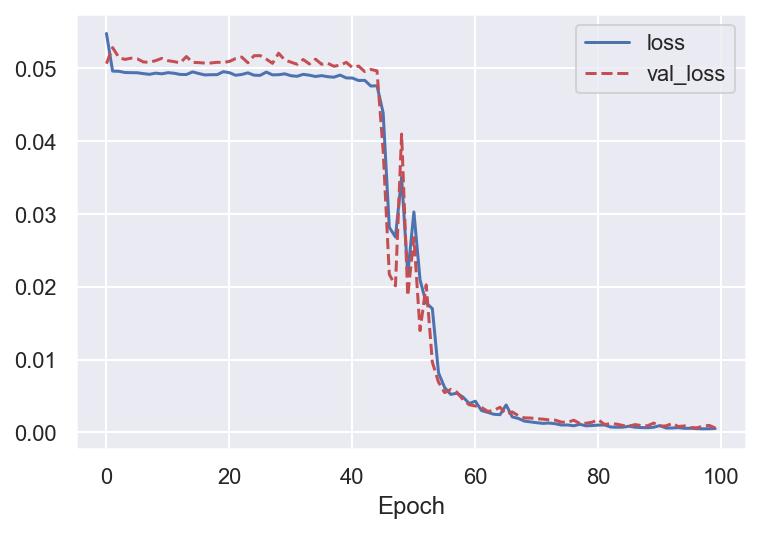

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()